In [1]:
import os
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [21]:
results_dir = os.path.join(os.pardir, "results")
program = "dijkstra_token_ring"  # coloring, dijkstra_token_ring, maximal_matching, maximal_independent_set
analysis_type = "full"  # full, partial
graph_names = ["implicit_graph_n13"]
plots_dir = os.path.join("plots", program, "node_vs_max_cvf_effect")

In [22]:
cut_off = 60

In [23]:
def get_df(graph_name):
    full_path = os.path.join(
        results_dir,
        program,
        f"rank_effect_by_node__{analysis_type}__{program}__{graph_name}.csv",
    )
    if not os.path.exists(full_path):
        print("File not found:", full_path)
        return None

    df = pd.read_csv(full_path)
    df["CVF (Avg)"] = df["CVF In (Avg)"] + df["CVF Out (Avg)"]
    # df["CVF (Max)"] = df["CVF In (Max)"] + df["CVF Out (Max)"]
    return df

In [24]:
def create_plots_dir_if_not_exists():
    if not os.path.exists(plots_dir):
        os.makedirs(plots_dir)

create_plots_dir_if_not_exists()

In [25]:
def plot_node_vs_rank_effect(df, ax, node_id_max):
    sns.scatterplot(data=df, x='Node', y='Rank Effect', ax=ax)
    ax.set_xlim(left=-0.5, right=node_id_max+0.5)
    ax.set_xticks([i for i in range(0, node_id_max+1)])

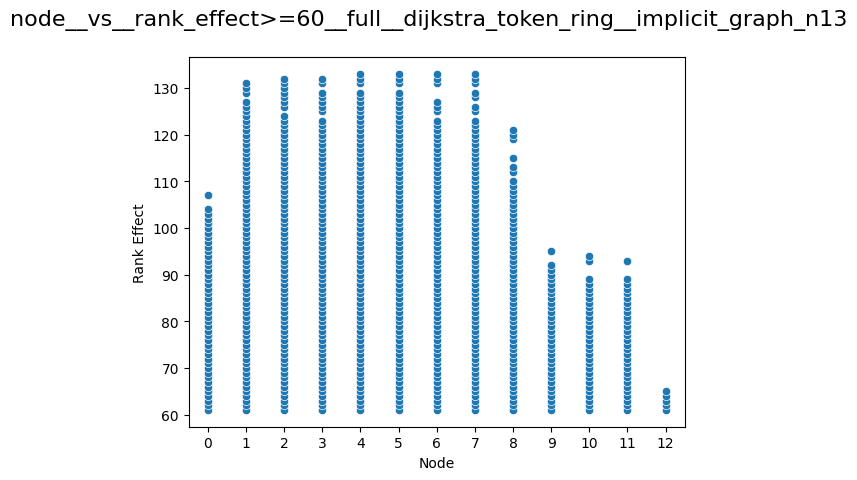

In [28]:
for graph_name in graph_names:
    df = get_df(graph_name)
    if df is None:
        continue
    node_id_max = df.agg({"Node": ["max"]})["Node"]["max"]
    grps = df[(df['CVF (Avg)'] > 0) & (df['Rank Effect'] > cut_off)].groupby(["Node", "Rank Effect"])
    data = grps.groups.keys()
    df = pd.DataFrame(data, columns = ["Node", "Rank Effect"])
    fig, ax = plt.subplots(1)
    fig_title = f"node__vs__rank_effect>={cut_off}__{analysis_type}__{program}__{graph_name}"
    fig.suptitle(fig_title, fontsize=16)
    plot_node_vs_rank_effect(df, ax, node_id_max)